In [27]:
from transformers import pipeline
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns 
import matplotlib.pyplot as plt
import os 
os.chdir("D:/Training/Academy/Deep Learning/Images/Sample Images/Other")

In [28]:
pipe = pipeline("image-feature-extraction", model="timm/vit_large_patch14_dinov2.lvd142m")

Device set to use cpu


In [29]:
img_embd_1 = pipe("cat1.jpg")

In [30]:
type(img_embd_1)

list

In [31]:
img_embd_1 = np.array(img_embd_1)
img_embd_1.shape

(1, 1370, 1024)

In [6]:
img_embd_2 = pipe("dog1 (2).jpg")
img_embd_2 = np.array(img_embd_2)
img_embd_2.shape

(1, 1370, 1024)

In [7]:
img_embd_3 = pipe("cat2.jpg")
img_embd_3 = np.array(img_embd_3)
img_embd_3.shape

(1, 1370, 1024)

In [34]:
img_embd_4 = pipe("dog1.jpg")
img_embd_4 = np.array(img_embd_4)
img_embd_4.shape

(1, 1370, 1024)

In [9]:
img_embd_1 = img_embd_1.reshape(1, -1) # cat
img_embd_2 = img_embd_2.reshape(1, -1) # dog
img_embd_3 = img_embd_3.reshape(1, -1) # cat
img_embd_4 = img_embd_4.reshape(1, -1) # dog

In [10]:
img_embd_1.shape, img_embd_2.shape, img_embd_3.shape, img_embd_4.shape

((1, 1402880), (1, 1402880), (1, 1402880), (1, 1402880))

In [11]:
result = cosine_similarity(img_embd_1, img_embd_3)
print(result)

[[0.25334516]]


In [13]:
result = cosine_similarity(img_embd_2, img_embd_4)
print(result)

[[0.22303758]]


In [12]:
result = cosine_similarity(img_embd_1, img_embd_4)
print(result)

[[0.21406427]]


In [15]:
result = cosine_similarity(img_embd_1, img_embd_2)
print(result)

[[0.18299173]]


In [16]:
result = cosine_similarity(img_embd_3, img_embd_4)
print(result)

[[0.21965247]]


In [35]:
os.chdir("D:/Training/Academy/Gen AI/Images")

In [36]:
files_list = os.listdir("D:/Training/Academy/Gen AI/Images")
files_list

['Interesting-Facts-about-Statue-of-Unity.jpg',
 'statue-of-unity.png',
 'statue-of-unity.webp',
 'statue_of_unity.webp',
 'Taj-Mahal.jpg',
 'taj1.jpeg',
 'Taj_Mahal_(Edited).jpeg']

In [37]:
img_embd_1 = pipe(files_list[0])
img_embd_1 = np.array(img_embd_1)

In [38]:
img_embd_2 = pipe(files_list[1])
img_embd_2 = np.array(img_embd_2)

In [39]:
img_embd_3 = pipe(files_list[2])
img_embd_3 = np.array(img_embd_3)

In [40]:
img_embd_4 = pipe(files_list[3])
img_embd_4 = np.array(img_embd_4)

In [41]:
img_embd_5 = pipe(files_list[4])
img_embd_5 = np.array(img_embd_5)

In [42]:
img_embd_6 = pipe(files_list[5])
img_embd_6 = np.array(img_embd_6)


In [43]:
img_embd_7 = pipe(files_list[6])
img_embd_7 = np.array(img_embd_7)

In [44]:
img_embd_1 = img_embd_1.reshape(1, -1) 
img_embd_2 = img_embd_2.reshape(1, -1) 
img_embd_3 = img_embd_3.reshape(1, -1) 
img_embd_4 = img_embd_4.reshape(1, -1) 
img_embd_5 = img_embd_5.reshape(1, -1) 
img_embd_6 = img_embd_6.reshape(1, -1) 
img_embd_7 = img_embd_7.reshape(1, -1) 

In [ ]:
files_list = os.listdir("D:/Training/Academy/Gen AI/Images")
all_img_embd = np.array([img_embd_1,img_embd_2,img_embd_3,
                         img_embd_4,img_embd_5,img_embd_6,img_embd_7])
all_img_embd = np.reshape(all_img_embd, (7, 1402880) )
sim_embd = pd.DataFrame( cosine_similarity(all_img_embd) )

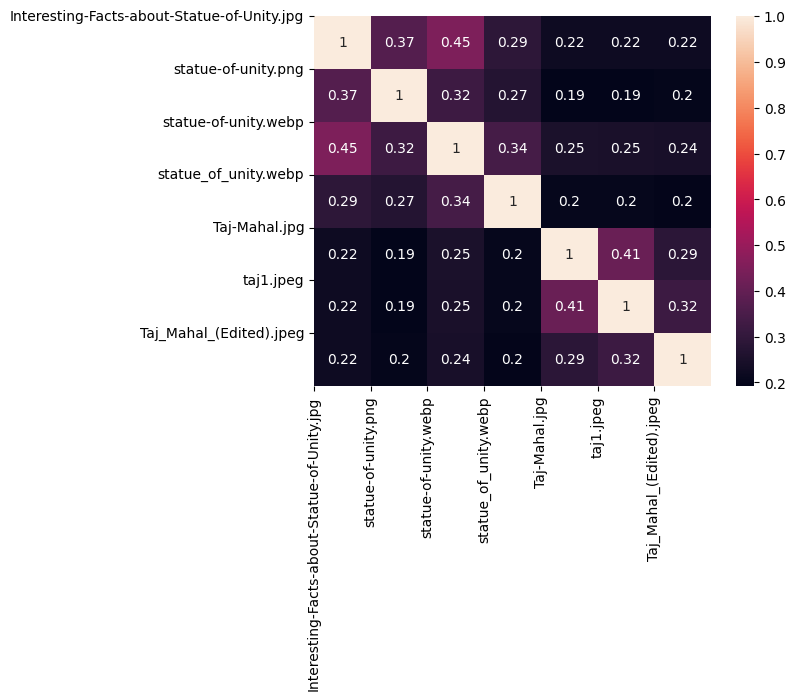

In [47]:
sns.heatmap(sim_embd, annot=True)
plt.xticks([0,1,2,3,4,5,6],files_list, rotation=90,)
plt.yticks([0,1,2,3,4,5,6],files_list, rotation=0)
plt.show()